Black–Scholes (European call): 10.450584
N=5     Binomial=10.805934  |Error|=3.553503e-01
N=10    Binomial=10.253409  |Error|=1.971745e-01
N=20    Binomial=10.351260  |Error|=9.932338e-02
N=40    Binomial=10.400751  |Error|=4.983209e-02
N=80    Binomial=10.425627  |Error|=2.495687e-02
N=160   Binomial=10.438095  |Error|=1.248841e-02
N=320   Binomial=10.444337  |Error|=6.246673e-03
N=640   Binomial=10.447460  |Error|=3.123949e-03


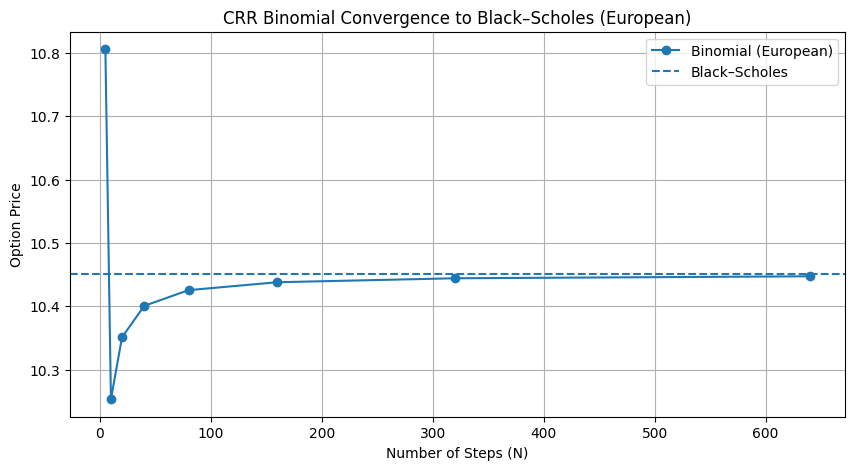

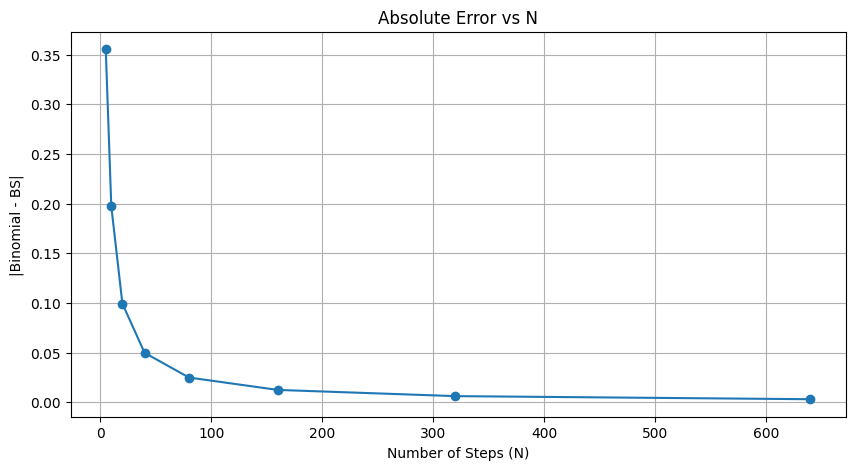

In [2]:
# 02_binomial_tree.ipynb — Cell 1: Convergence with sample parameters

import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(r"C:\Users\utkarsh\OneDrive\Desktop\quant-projects\project1_option_vol\src"))
from binomial import crr_price
from bs import black_scholes_price  # already in your repo
import numpy as np

# ---------- Sample Parameters ----------
S = 100.0
K = 100.0
r = 0.05
q = 0.00
sigma = 0.20
T = 1.0
option = "call"

# Black–Scholes benchmark (European)
bs_price_euro = black_scholes_price(S, K, T, r, sigma, option_type=option)
print(f"Black–Scholes (European {option}): {bs_price_euro:.6f}")

# Convergence study over N
Ns = [5, 10, 20, 40, 80, 160, 320, 640]
binom_prices = []
abs_errors = []

for N in Ns:
    priceN = crr_price(S, K, r, q, sigma, T, N=N, option=option, american=False)
    binom_prices.append(priceN)
    abs_errors.append(abs(priceN - bs_price_euro))

# Display results
for N, p, e in zip(Ns, binom_prices, abs_errors):
    print(f"N={N:<4}  Binomial={p:.6f}  |Error|={e:.6e}")

# ---------- Plots ----------
plt.figure(figsize=(10,5))
plt.plot(Ns, binom_prices, marker='o', label='Binomial (European)')
plt.axhline(bs_price_euro, linestyle='--', label='Black–Scholes')
plt.title('CRR Binomial Convergence to Black–Scholes (European)')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.grid(True); plt.legend(); plt.show()

plt.figure(figsize=(10,5))
plt.plot(Ns, abs_errors, marker='o')
plt.title('Absolute Error vs N')
plt.xlabel('Number of Steps (N)')
plt.ylabel('|Binomial - BS|')
plt.grid(True); plt.show()
